<a href="https://colab.research.google.com/github/mja628/magnetic-reconnection/blob/main/spaceapps_magnetic_reconnection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

upgrade to pandas 2 for `date_format` kwarg in `read_csv()`

In [ ]:
!pip install pandas --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [ ]:
!pip install geopack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 784.7 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pylab as pl
import pandas as pd

from time import sleep
from ftplib import FTP_TLS

from geopack import geopack
from geopack import t96

Load IGRF coefficients ...


In [ ]:
assert int(pd.__version__[0]) >= 2

# GET DATA

### low-res OMNI

here we access the low-res OMNI data for all years in order to retrieve Disturbance Storm Time (DST) measurements



In [ ]:
dst_df = pd.read_csv('https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni2_all_years.dat',
                     delim_whitespace=True, parse_dates={'datetime':[0,1,2]}, date_format='%Y %j %H',
                     usecols=(0,1,2,40), names={'Year':0, 'Decimal Day':1, 'Hour':2, 'DST':40}).replace(99999,np.nan)
dst_df.set_index('datetime', inplace=True)
dst_df

,DST
datetime,
1963-01-01 00:00:00,-6.0
1963-01-01 01:00:00,-5.0
1963-01-01 02:00:00,-5.0
1963-01-01 03:00:00,-3.0
1963-01-01 04:00:00,-3.0
...,...
2023-12-31 19:00:00,NaN
2023-12-31 20:00:00,NaN
2023-12-31 21:00:00,NaN


## high-res (1 minute) Omni


In [ ]:
session = FTP_TLS('spdf.gsfc.nasa.gov')
session.login()
session.cwd('pub/data/omni/high_res_omni/')

omni_dir = 'https://spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/'
omni_urls = [omni_dir + f[0] for f in session.mlsd() if f[0][:8] == 'omni_min']

session.quit()

'221 Goodbye.'

In [ ]:
omni_urls.sort()
len(omni_urls)

43

### downloading all high-res OMNI data

In [ ]:
omni = []
for url in omni_urls:
  omni.append(pd.read_csv(url, delim_whitespace=True, parse_dates={'datetime':[0,1,2,3]},date_format='%Y %j %H %M',
                          usecols=[0, 1, 2, 3, 14, 17, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33],
                          names=['Year','Day','Hour','Minute', 'Bx,GSM', 'By,GSM', 'Bz,GSM', 'Flow Speed',
                                 'Vx,GSE', 'Vy,GSE', 'Vz,GSE', 'Proton Density', 'Flow Pressure',
                                 'Electric Field', 'Plasma Beta', 'Alfven Mach Number',
                                 'x,GSE', 'y,GSE', 'z,GSE']))

  print('\b'*10, url[63:67])

print("\nDone loading OMNI data")

 1981
 1982
 1983
 1984
 1985
 1986
 1987
 1988
 1989
 1990
 1991
 1992
 1993
 1994
 1995
 1996
 1997
 1998
 1999
 2000
 2001
 2002
 2003
 2004
 2005
 2006
 2007
 2008
 2009
 2010
 2011
 2012
 2013
 2014
 2015
 2016
 2017
 2018
 2019
 2020
 2021
 2022
 2023

Done loading Omni data


In [ ]:
omni_df = pd.concat(omni, ignore_index=True).set_index('datetime').sort_index()  # condense all omni data in one df
omni_df.replace([99.99, 999.9, 999.99, 9999.99, 99999.9], np.nan, inplace=True)  # set all fill values to nan
omni_df['DST'] = dst_df.reindex(index=omni_df.index, method='pad')['DST']        # add DST column
omni_df                                                                          # display result

,"Bx,GSM","By,GSM","Bz,GSM",Flow Speed,"Vx,GSE","Vy,GSE","Vz,GSE",Proton Density,Flow Pressure,Electric Field,Plasma Beta,Alfven Mach Number,"x,GSE","y,GSE","z,GSE",DST
datetime,,,,,,,,,,,,,,,,
1981-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
1981-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


download more RAM with this one simple trick:

In [ ]:
del omni

# PROCESSING AND PLOTTING

### big plot of $B_z$ over entire time range

plotting the z-component of the interplanetary magnetic field as measured every 5 minutes since 1981

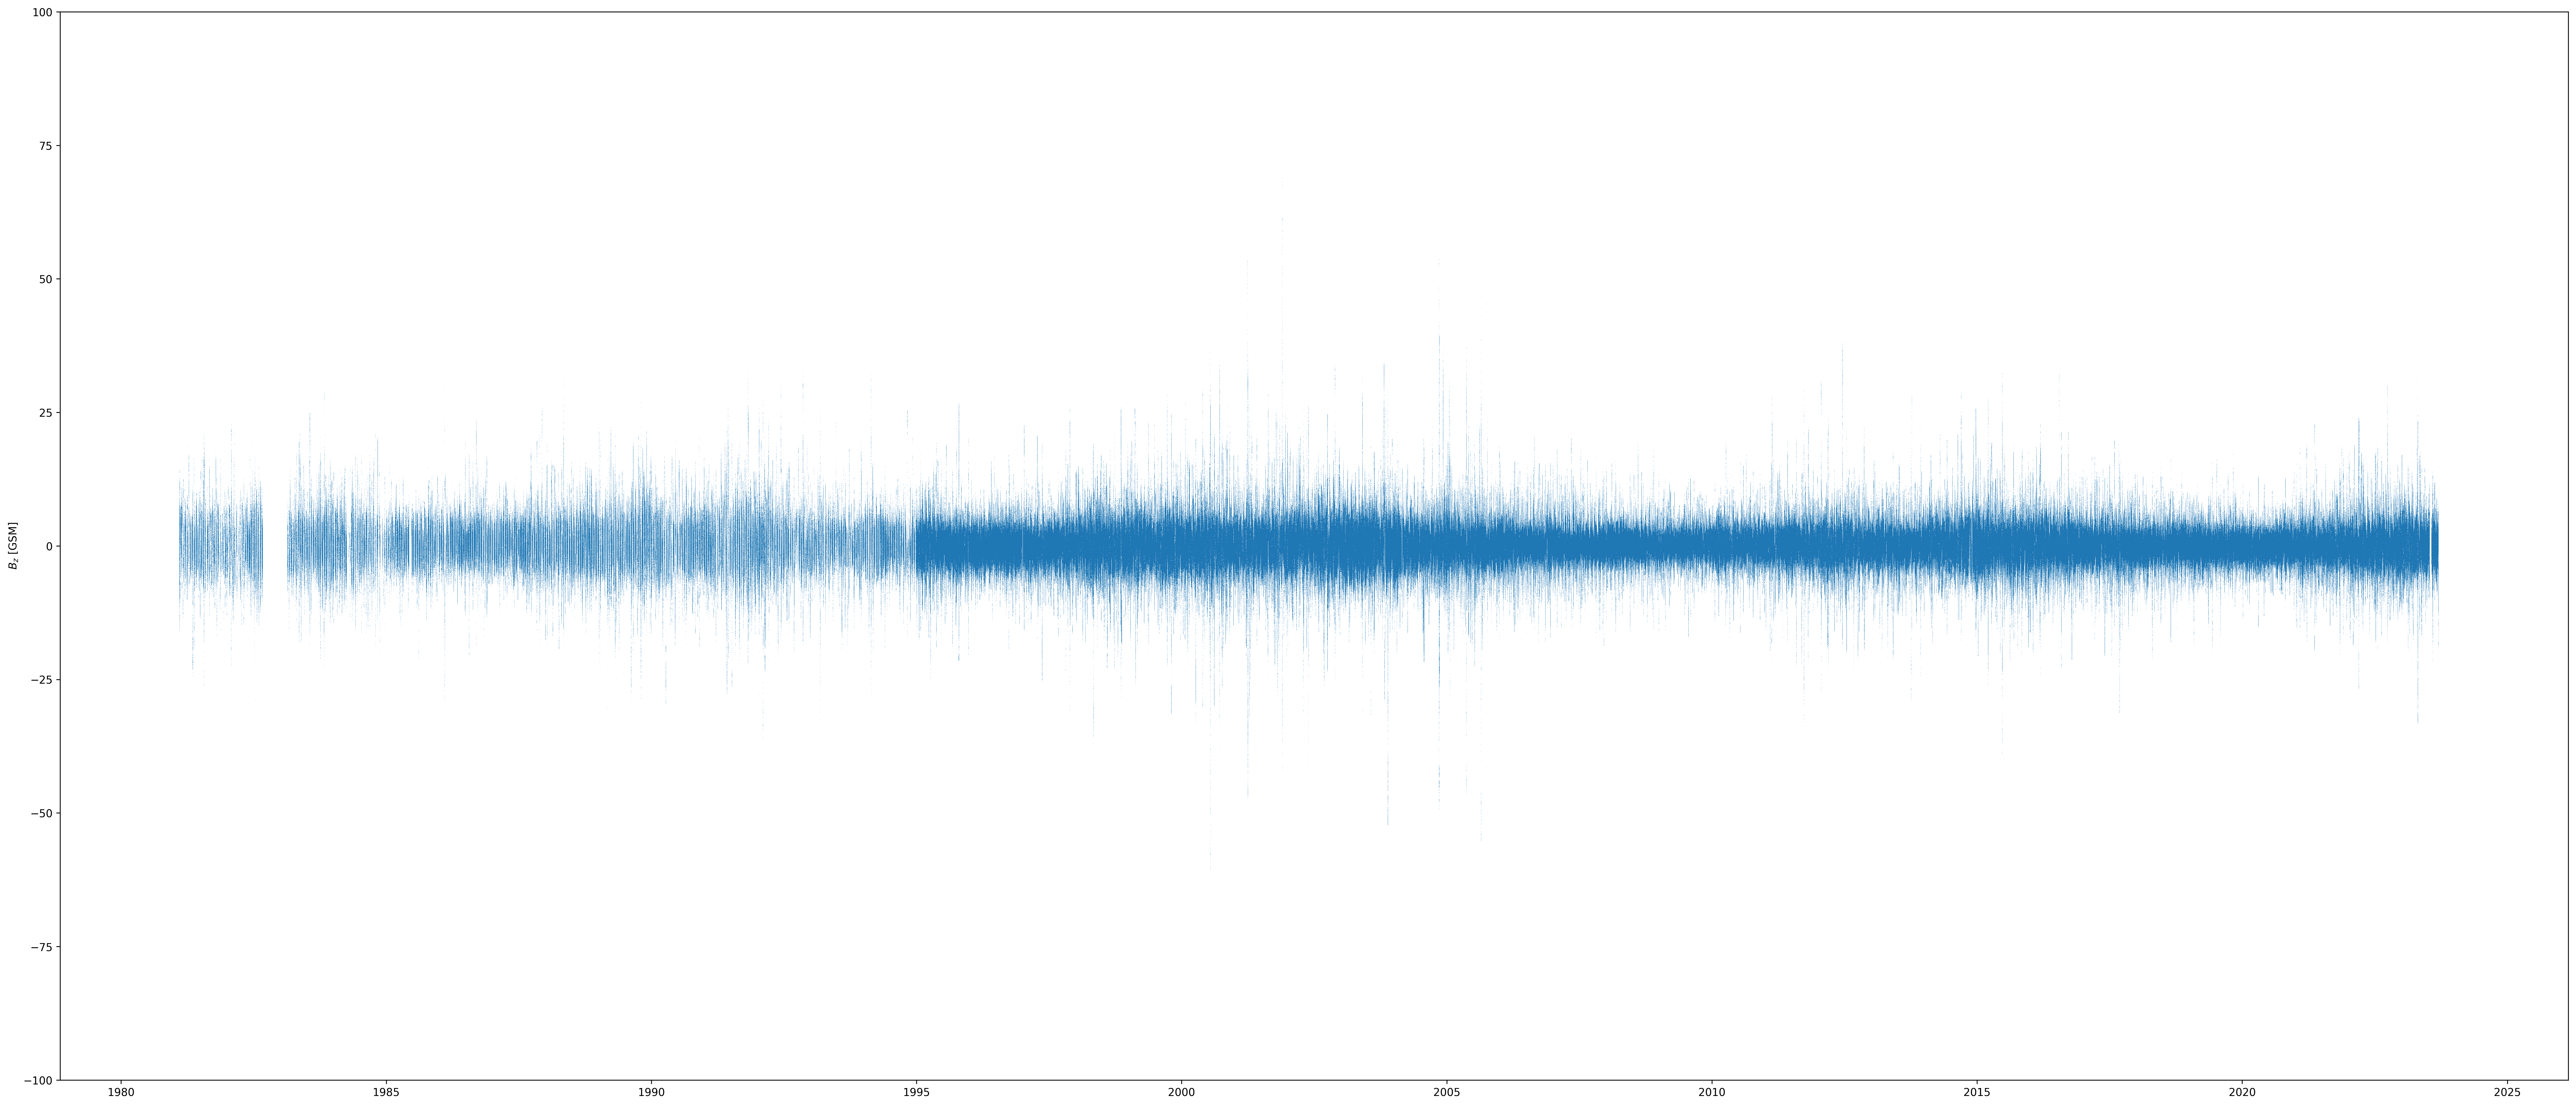

In [ ]:
pl.figure(figsize=(42,18), dpi=300)
pl.plot(omni_df.index, omni_df['Bz,GSM'], ',')
pl.ylabel('$B_z$ [GSM]')
pl.ylim(-100, 100)
pl.savefig('omni_bz_plot.png')
pl.show()

## Computing $\theta_\mathrm{shear} = \arccos\left(\frac{B_i \cdot B_e}{|B_i||B_e|}\right)$ via Tsyganenko model

Dynamic pressure:
$P_\mathrm{dyn} = m_i n_\mathrm{sw} \mathbf{u}^2_\mathrm{sw}$

In [ ]:

def calculate_ThetaShear(df, StartLoc=(5, 0, 0), Resolution=10):
  """
  Calculates the internal and external magnetic fields at around specified origin for a given IMF dataframe
  using the t96 model by Tsyganenko. Uses the magnetic fields to calculate the shear angle for
  a square range of locations 10 Re on either side of the origin.

  Parameters:
   - df - pandas dataframe of the collected magnetic field data from NASA probes
   - StartLoc - a tuple of the origin coordinates of the simulation
   - Resolution - the dimensionality of the theta_shear array, inversely proportional to the width of each spatial step

   Returns:
    - IMFCA - IMF clock angle
    - theta_shearArr - an array of theta_shear angles at a range of locations around the origin
  """
  # create arrays to be added to the initial position to span a larger area
  spatial_extent = 20 # earth radii
  Ex = 0.5*spatial_extent
  Dy = np.linspace(-Ex, Ex, Resolution)
  Dz = np.linspace(-Ex, Ex, Resolution)

  # empty array with same index as input
  theta_shear = np.zeros((df.index.size, Resolution, Resolution))

  # calculate the clock angle of the interplanetary magnetic field
  IMFCA = np.arctan2(df['By,GSM'], df['Bz,GSM'])

  # origin coordinates
  x = StartLoc[0]
  y = StartLoc[1]
  z = StartLoc[2]

  # represent time index as unix timestamps
  UT = df.index.astype(int) // int(10e9)

  data = zip(np.arange(test_df.index.size), df['Flow Pressure'], df['By,GSM'], df['Bz,GSM'],
             df['Vx,GSE'], df['Vy,GSE'], df['Vz,GSE'], df['DST'], UT)

  for t, pdyn, by, bz, vx, vy, vz, dst, ut in data:
    ps = geopack.recalc(ut, vx, vy, vz)
    par = np.array([pdyn, dst, by, bz, 0, 0, 0, 0, 0, 0])

    # calculate the external and internal magnetic fields around the coordinate origin
    for iz, dz in enumerate(Dz):
      for iy, dy in enumerate(Dy):
        pos = (x, y+dy, z+dz)
        theta_shear[t, iy, iz] = compute_shear(par, ps, pos)

  return IMFCA, theta_shear



def compute_shear(par, ps, position):
  """
  returns theta in degrees
  """
  dBe = geopack.t96.t96(par, ps, *position)
  dBi = geopack.dip(*position)

  costheta = np.clip(np.dot(dBe, dBi) / (np.linalg.norm(dBi) * np.linalg.norm(dBe)), -1.0, 1.0)
  return np.degrees(np.arccos(costheta))

In [ ]:
StartDate = '2002-06-18 22:25'
EndDate = '2002-06-18 23:55'

imfca, theta = calculate_ThetaShear(omni_df[StartDate : EndDate], Resolution=80)

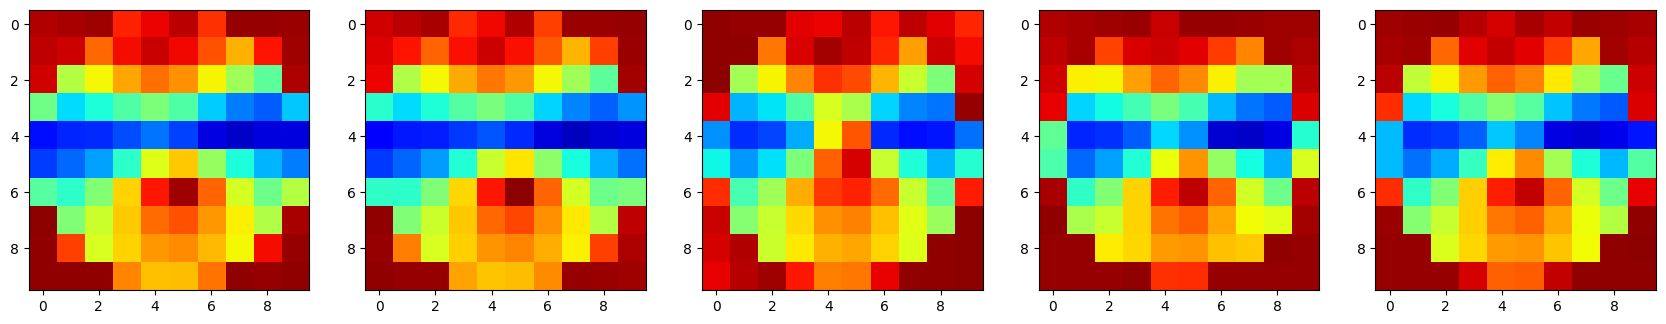

In [ ]:
pl.subplots(1,5, figsize=(21,9))

for i, data in enumerate(theta[0:50:10]):
  pl.subplot(1,5,i+1)
  pl.imshow(data.T, cmap='jet', vmin=0, vmax=180)
pl.show()